In [1]:
import pandas as pd
import numpy as np

In [13]:
apple=pd.read_csv('apple.csv')
google=pd.read_csv('google.csv')

In [3]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [14]:
apple.head()

,Unnamed: 0,app,size,price,rating_count,rating_count_ver,rating,rating_ver,content,category
0,0,PAC-MAN Premium,100.788,3.99,21292,26,4.0,4.5,4+,Games
1,1,Evernote - stay organized,158.579,0.00,161065,26,4.0,3.5,4+,Productivity
2,2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524,0.00,188583,2822,3.5,4.5,4+,Weather
3,3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512,0.00,262241,649,4.0,4.5,12+,Shopping
4,4,Bible,92.774,0.00,985920,5320,4.5,5.0,4+,Books & Reference


In [15]:
apple['size']=apple['size'].apply(lambda x: x.replace(',','') if ',' in str(x) else x).apply(float)

In [7]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 10 columns):
Unnamed: 0          7189 non-null int64
app                 7189 non-null object
size                7189 non-null float64
price               7189 non-null float64
rating_count        7189 non-null int64
rating_count_ver    7189 non-null int64
rating              7189 non-null float64
rating_ver          7189 non-null float64
content             7189 non-null object
category            7189 non-null object
dtypes: float64(4), int64(3), object(3)
memory usage: 561.7+ KB


In [16]:
#make dummies for category
for i in apple['category'].unique():
    name = 'dummy_'+i
    apple[name] = np.where(apple['category']==i,1,0)

#make dummies for content rating
for i in apple['content'].unique():
    name = 'dummy_content_'+i
    apple[name] = np.where(apple['category']==i,1,0)

In [24]:
apple=apple.drop('Unnamed: 0',axis=1)

In [40]:
len(train)

5032

In [66]:
train, test = train_test_split(apple, test_size = 0.3)
x_train = train.drop(['app','rating_count_ver','rating_ver','content','category','rating'],axis=1)
y_train = train[['rating']]
x_test = test.drop(['app','rating_count_ver','rating_ver','content','category','rating'],axis=1)
y_test = test[['rating']]

In [69]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
test_predictions = linear_reg.predict(x_test)

In [75]:
linear_reg.score(x_train,y_train)

0.050726840503521164

In [77]:
#MSE
np.mean((test_predictions-y_test.values)**2)

2.2662153099761126

In [100]:
linear_reg.coef_[0]

array([ 1.28860806e-04,  2.51438113e-02,  1.66903356e-06,  3.87851446e-01,
        6.57511950e-01,  3.11925606e-01,  2.11669920e-01, -5.03319370e-01,
       -7.58095359e-01,  1.09430398e-01,  2.19515564e-02,  3.21463174e-01,
       -2.73953631e-01, -2.00712146e-01,  5.32629935e-01,  4.01815953e-01,
        5.40331342e-01, -5.07594033e-01,  9.64556877e-02, -3.58168652e-01,
       -2.30484583e-01, -3.89075589e-01, -3.71633606e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [105]:
apple_coef=linear_reg.coef_[0]

In [106]:
apple_regressors=np.array(train.drop(['app','rating_count_ver','rating_ver','content','category','rating'],axis=1).keys())

# Apple Linear Regression 

In [107]:
apple_linear_result=pd.DataFrame(data={'regressors':apple_regressors, 'coefficients':apple_coef})
apple_linear_result

,regressors,coefficients
0,size,0.000129
1,price,0.025144
2,rating_count,0.000002
3,dummy_Games,0.387851
4,dummy_Productivity,0.657512
5,dummy_Weather,0.311926
6,dummy_Shopping,0.211670
7,dummy_Books & Reference,-0.503319
8,dummy_Finance,-0.758095
9,dummy_Entertainment,0.109430


# Apple Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor

### try various versions of trees
random_forest = RandomForestRegressor(n_estimators= 10, random_state=50)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
random_forest.fit(x_train,np.ravel(y_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

Text(0.5, 0, 'Relative Importance')

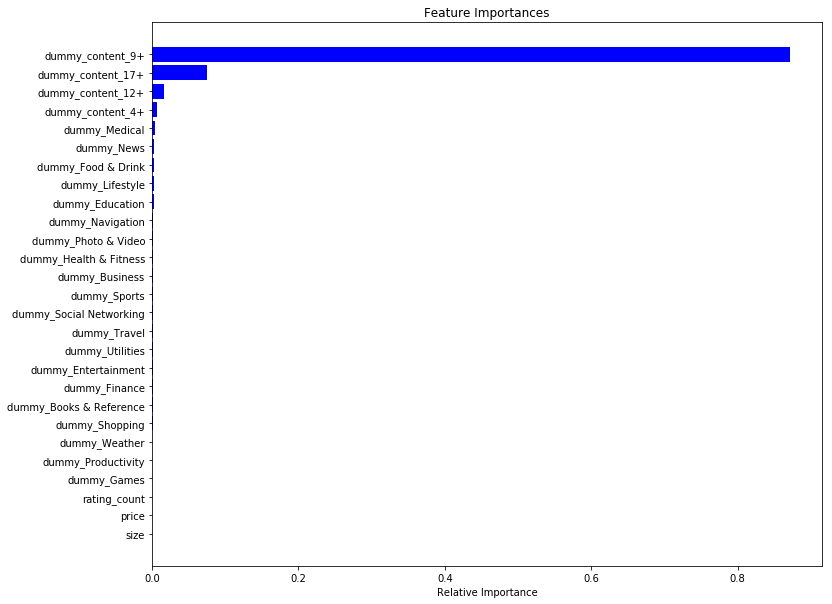

In [130]:
import matplotlib.pyplot as plt
feature_names = [key for key in x_train]
%matplotlib inline
importances = random_forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

In [131]:
random_forest.score(x_test,y_test)

0.7969376602552865

In [ ]:
#remove content rating dummies, see the importance of category

In [132]:
random_forest = RandomForestRegressor(n_estimators= 10, random_state=50)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
random_forest.fit(x_train.drop(['dummy_content_9+','dummy_content_17+','dummy_content_12+',
                              'dummy_content_4+'],axis=1),np.ravel(y_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

Text(0.5, 0, 'Relative Importance')

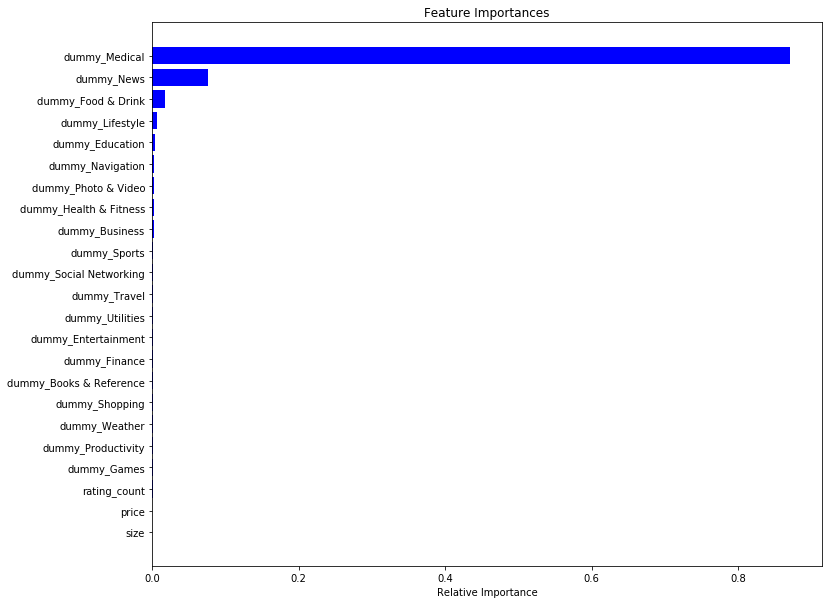

In [133]:
import matplotlib.pyplot as plt
feature_names = [key for key in x_train.drop(['dummy_content_9+','dummy_content_17+','dummy_content_12+',
                              'dummy_content_4+'],axis=1)]
%matplotlib inline
importances = random_forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

In [134]:
random_forest.score(x_test.drop(['dummy_content_9+','dummy_content_17+','dummy_content_12+',
                              'dummy_content_4+'],axis=1),y_test)

0.7995637859522152

In [136]:
apple.head()

,app,size,price,rating_count,rating_count_ver,rating,rating_ver,content,category,dummy_Games,...,dummy_Navigation,dummy_Education,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Medical,dummy_content_4+,dummy_content_12+,dummy_content_17+,dummy_content_9+
0,PAC-MAN Premium,100.788,3.99,21292,26,4.0,4.5,4+,Games,1,...,0,0,0,0,0,0,0,0,0,0
1,Evernote - stay organized,158.579,0.00,161065,26,4.0,3.5,4+,Productivity,0,...,0,0,0,0,0,0,0,0,0,0
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524,0.00,188583,2822,3.5,4.5,4+,Weather,0,...,0,0,0,0,0,0,0,0,0,0
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512,0.00,262241,649,4.0,4.5,12+,Shopping,0,...,0,0,0,0,0,0,0,0,0,0
4,Bible,92.774,0.00,985920,5320,4.5,5.0,4+,Books & Reference,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
apple['popularity']

# Google Random Forest

In [78]:
#make dummies for category
for i in google['category'].unique():
    name = 'dummy_'+i
    google[name] = np.where(google['category']==i,1,0)

#make dummies for content rating
for i in google['content'].unique():
    name = 'dummy_content_'+i
    google[name] = np.where(google['category']==i,1,0)

In [104]:
google=google.drop('Unnamed: 0',axis=1)
google

,app,rating,rating_count,size,installs,type,price,content,category,dummy_Lifestyle,...,dummy_Sports,dummy_Travel,dummy_Utilities,dummy_Weather,dummy_News,dummy_Navigation,dummy_content_4+,dummy_content_12+,dummy_content_9+,dummy_content_17+
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.000,10000,Free,0.0,4+,Lifestyle,1,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14.000,500000,Free,0.0,4+,Lifestyle,1,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.700,5000000,Free,0.0,4+,Lifestyle,1,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25.000,50000000,Free,0.0,12+,Lifestyle,1,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.800,100000,Free,0.0,4+,Lifestyle,1,...,0,0,0,0,0,0,0,0,0,0
5,Paper flowers instructions,4.4,167,5.600,50000,Free,0.0,4+,Lifestyle,1,...,0,0,0,0,0,0,0,0,0,0
6,Smoke Effect Photo Maker - Smoke Editor,3.8,178,19.000,50000,Free,0.0,4+,Lifestyle,1,...,0,0,0,0,0,0,0,0,0,0
7,Infinite Painter,4.1,36815,29.000,1000000,Free,0.0,4+,Lifestyle,1,...,0,0,0,0,0,0,0,0,0,0
8,Garden Coloring Book,4.4,13791,33.000,1000000,Free,0.0,4+,Lifestyle,1,...,0,0,0,0,0,0,0,0,0,0
9,Kids Paint Free - Drawing Fun,4.7,121,3.100,10000,Free,0.0,4+,Lifestyle,1,...,0,0,0,0,0,0,0,0,0,0


In [171]:
google.dropna(inplace=True)

In [172]:
train, test = train_test_split(google, test_size = 0.3)
x_train = train.drop(['app','content','category','rating','type'],axis=1)
y_train = train[['rating']]
x_test = test.drop(['app','content','category','rating','type'],axis=1)
y_test = test[['rating']]

In [173]:
random_forest = RandomForestRegressor(n_estimators= 10, random_state=50)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
random_forest.fit(x_train,np.ravel(y_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

Text(0.5, 0, 'Relative Importance')

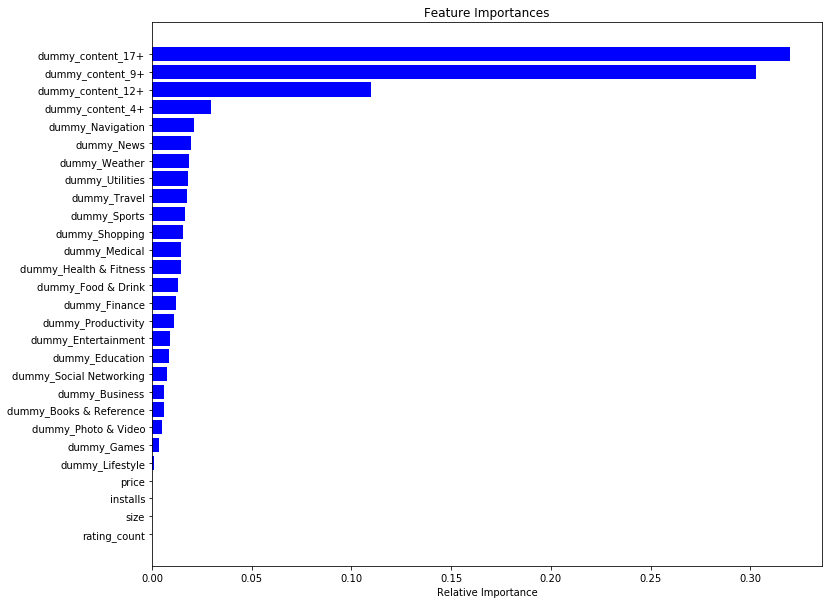

In [174]:
feature_names = [key for key in x_train]
%matplotlib inline
importances = random_forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')